In [1]:
import pandas as pd

In [2]:
diabites = pd.read_csv('02-TensorFlow-Basics\pima-indians-diabetes.csv')

In [3]:
diabites.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabites.shape

(768, 10)

In [4]:
diabites.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norms=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

#normalization

In [6]:
diabites[cols_to_norms]=diabites[cols_to_norms].apply(lambda x:(x - x.min()) / (x.max() - x.min() ))

In [7]:
diabites.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
diabites.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
#ALTERNATIVE when you don't know the list or it is too big so that uou ccan't write in that case hash bucket use
#alternative_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

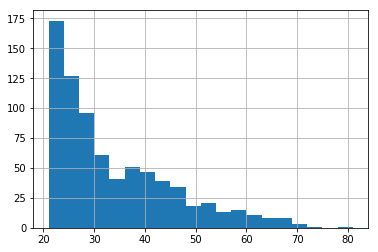

In [13]:
diabites['Age'].hist(bins=20)

In [14]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [15]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_bucket]

#TRAIN TEST split

In [16]:
x_data = diabites.drop('Class',axis=1)

In [17]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [18]:
labels = diabites['Class']

In [19]:
#labels


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels, test_size=0.33, random_state=101)

In [23]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10, num_epochs=1000,shuffle=True)

In [24]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\HP\\AppData\\Local\\Temp\\tmpndcbwynp', '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_session_config': None}


In [25]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\HP\AppData\Local\Temp\tmpndcbwynp\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 506.59
INFO:tensorflow:step = 101, loss = 4.9065 (0.199 sec)
INFO:tensorflow:global_step/sec: 582.729
INFO:tensorflow:step = 201, loss = 5.19012 (0.171 sec)
INFO:tensorflow:global_step/sec: 600.635
INFO:tensorflow:step = 301, loss = 6.93726 (0.168 sec)
INFO:tensorflow:global_step/sec: 600.405
INFO:tensorflow:step = 401, loss = 4.67427 (0.167 sec)
INFO:tensorflow:global_step/sec: 566.482
INFO:tensorflow:step = 501, loss = 3.53601 (0.175 sec)
INFO:tensorflow:global_step/sec: 563.302
INFO:tensorflow:step = 601, loss = 6.17622 (0.179 sec)
INFO:tensorflow:global_step/sec: 586.245
INFO:tensorflow:step = 701, loss = 3.35319 (0.170 sec)
INFO:tensorflow:global_step/sec: 611.024
INFO:tensorflow:step = 801, loss = 6.17763 (0.166 sec)
INFO:tensorflow:global_step/sec: 587.976
INFO:te

In [27]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [28]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-02-27-16:01:32
INFO:tensorflow:Restoring parameters from C:\Users\HP\AppData\Local\Temp\tmpndcbwynp\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-02-27-16:01:33
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.712598, accuracy_baseline = 0.65748, auc = 0.789249, auc_precision_recall = 0.634281, average_loss = 0.538322, global_step = 1000, label/mean = 0.34252, loss = 5.25899, prediction/mean = 0.404963


In [29]:
results

{'accuracy': 0.71259844,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78924906,
 'auc_precision_recall': 0.63428134,
 'average_loss': 0.53832179,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2589898,
 'prediction/mean': 0.40496325}

In [32]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [33]:
pred = model.predict(pred_input_func)

In [35]:
list(pred)

INFO:tensorflow:Restoring parameters from C:\Users\HP\AppData\Local\Temp\tmpndcbwynp\model.ckpt-1000


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.56888127], dtype=float32),
  'logits': array([ 0.27728808], dtype=float32),
  'probabilities': array([ 0.43111882,  0.56888127], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.6981864], dtype=float32),
  'logits': array([ 0.83867645], dtype=float32),
  'probabilities': array([ 0.30181363,  0.6981864 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.41256467], dtype=float32),
  'logits': array([-0.35337329], dtype=float32),
  'probabilities': array([ 0.58743536,  0.41256467], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.36476624], dtype=float32),
  'logits': array([-0.55473632], dtype=float32),
  'probabilities': array([ 0.63523376,  0.36476624], dtype=floa

In [36]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\HP\\AppData\\Local\\Temp\\tmp1mh_oo2b', '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_session_config': None}


#DNN uses embedded columns

In [37]:
embeeded_gruop_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [38]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embeeded_gruop_colcol, age_bucket]

In [40]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [41]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\HP\\AppData\\Local\\Temp\\tmp3mc_9_6y', '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_session_config': None}


In [42]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\HP\AppData\Local\Temp\tmp3mc_9_6y\model.ckpt.
INFO:tensorflow:step = 1, loss = 9.35581
INFO:tensorflow:global_step/sec: 472.462
INFO:tensorflow:step = 101, loss = 3.0835 (0.213 sec)
INFO:tensorflow:global_step/sec: 573.086
INFO:tensorflow:step = 201, loss = 4.09194 (0.177 sec)
INFO:tensorflow:global_step/sec: 498.752
INFO:tensorflow:step = 301, loss = 4.99551 (0.200 sec)
INFO:tensorflow:global_step/sec: 482.126
INFO:tensorflow:step = 401, loss = 3.41833 (0.207 sec)
INFO:tensorflow:global_step/sec: 488.183
INFO:tensorflow:step = 501, loss = 5.52441 (0.205 sec)
INFO:tensorflow:global_step/sec: 487.467
INFO:tensorflow:step = 601, loss = 4.74714 (0.205 sec)
INFO:tensorflow:global_step/sec: 547.494
INFO:tensorflow:step = 701, loss = 6.40653 (0.184 sec)
INFO:tensorflow:global_step/sec: 495.471
INFO:tensorflow:step = 801, loss = 2.33573 (0.201 sec)
INFO:tensorflow:global_step/sec: 522.228
INFO:t

In [43]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [45]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-02-27-16:28:39
INFO:tensorflow:Restoring parameters from C:\Users\HP\AppData\Local\Temp\tmp3mc_9_6y\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-02-27-16:28:40
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76378, accuracy_baseline = 0.65748, auc = 0.828378, auc_precision_recall = 0.681301, average_loss = 0.494979, global_step = 1000, label/mean = 0.34252, loss = 4.83557, prediction/mean = 0.402916


{'accuracy': 0.76377952,
 'accuracy_baseline': 0.65748036,
 'auc': 0.82837766,
 'auc_precision_recall': 0.68130064,
 'average_loss': 0.49497932,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.835567,
 'prediction/mean': 0.40291575}